In [2]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Download the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [3]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=0)

In [5]:
# After the split
print("Training set:")
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

print("\nValidation set:")
print("X_valid shape:", x_valid.shape)
print("y_valid shape:", y_valid.shape)

print("\nTest set:")
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


Training set:
X_train shape: (45000, 32, 32, 3)
y_train shape: (45000, 1)

Validation set:
X_valid shape: (5000, 32, 32, 3)
y_valid shape: (5000, 1)

Test set:
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


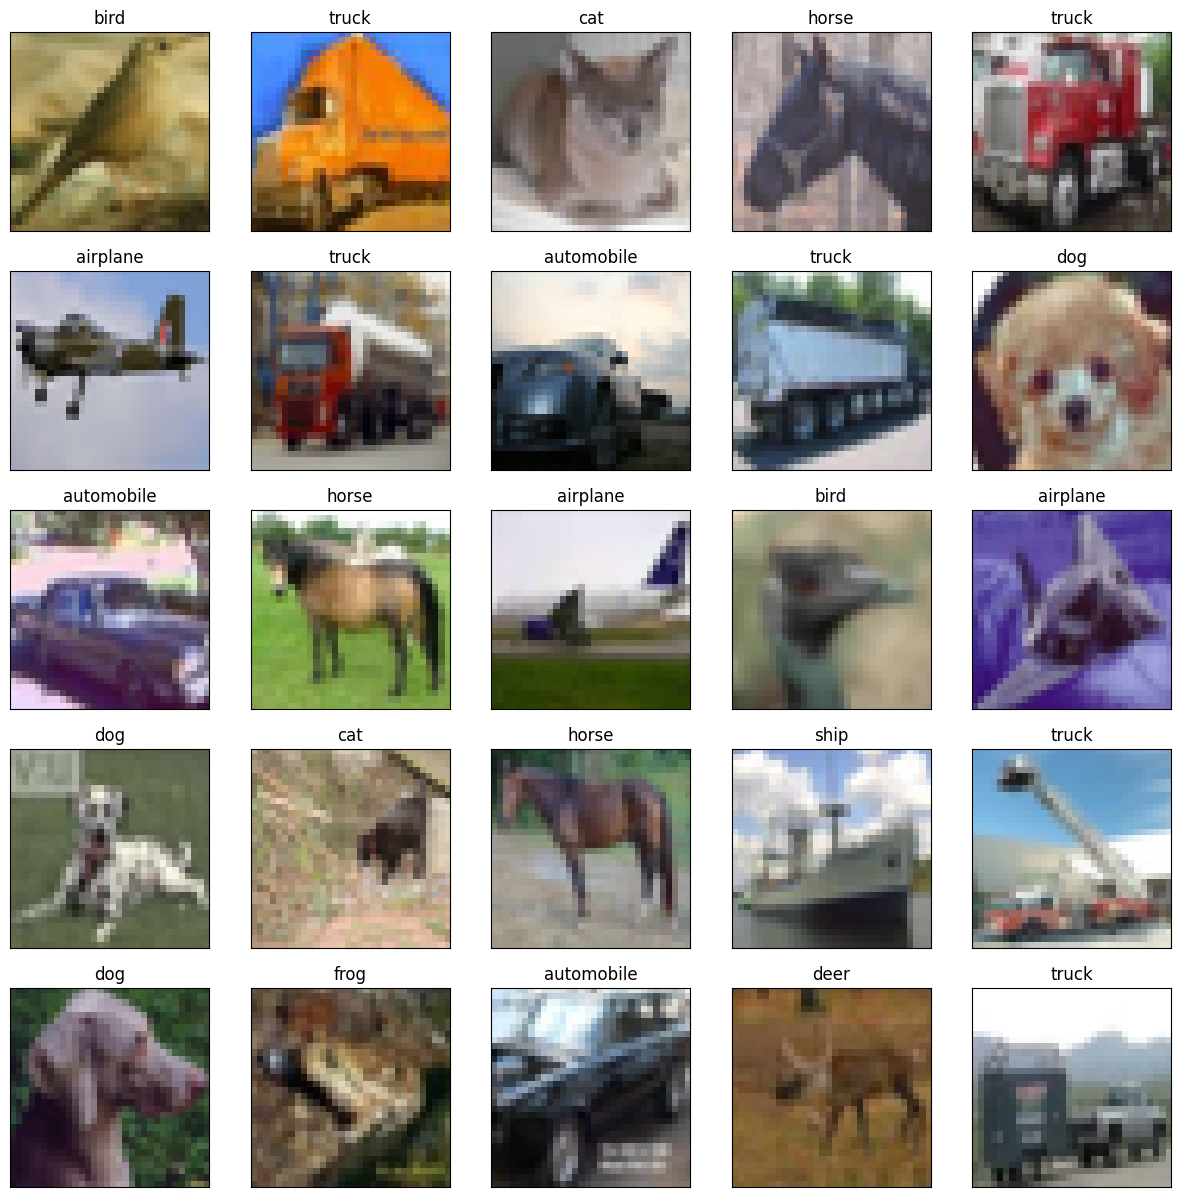

In [9]:
# CIFAR-10 classes
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
               
# Create a new figure
plt.figure(figsize=(15,15))

# Loop over the first 25 images
for i in range(25):
    # Create a subplot for each image
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Display the image
    plt.imshow(x_train[i])

    # Set the label as the title
    plt.title(cifar10_classes[y_train[i][0]], fontsize=12)

# Display the figure
plt.show()

In [10]:
# Convert pixel values data type to float32
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_valid = x_valid.astype('float32')

# Calculate the mean and standard deviation of the training images
mean = np.mean(x_train)
std  = np.std(x_train)

# Normalize the data
# The tiny value 1e-7 is added to prevent division by zero
x_train = (x_train-mean)/(std+1e-7)
x_test  = (x_test-mean) /(std+1e-7)
x_valid = (x_valid-mean)/(std+1e-7)

In [11]:
y_train= to_categorical(y_train,10)
y_valid= to_categorical(y_valid,10)
y_test = to_categorical(y_test,10)

In [29]:
data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range =0.15,  
    brightness_range=(0.5, 1.5),
    channel_shift_range=0.2,
    fill_mode = 'nearest'
)



In [30]:
nk_model = Sequential()

weight_decay = 0.0003

# First layer
nk_model.add(Conv2D(32, (3, 3), padding='same', activation='relu',
                    kernel_regularizer=l2(weight_decay), input_shape=x_train.shape[1:]))
nk_model.add(BatchNormalization())

# Second layer
nk_model.add(Conv2D(32, (3, 3), padding='same', activation='relu',
                    kernel_regularizer=l2(weight_decay)))
nk_model.add(BatchNormalization())
nk_model.add(MaxPooling2D(pool_size=(2, 2)))
nk_model.add(Dropout(0.25))

# Third layer
nk_model.add(Conv2D(64, (3, 3), padding='same', activation='relu',
                    kernel_regularizer=l2(weight_decay)))
nk_model.add(BatchNormalization())
nk_model.add(MaxPooling2D(pool_size=(2, 2)))
nk_model.add(Dropout(0.3))

# Fourth layer
nk_model.add(Conv2D(128, (3, 3), padding='same', activation='relu',
                    kernel_regularizer=l2(weight_decay)))
nk_model.add(BatchNormalization())



#Fifth layer
nk_model.add(Conv2D(256,(3,3),padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
nk_model.add(BatchNormalization())
nk_model.add(MaxPooling2D(pool_size=(2,2)))
nk_model.add(Dropout(0.4))

nk_model.add(Flatten())

# Optional fully connected layer
nk_model.add(Dense(512, activation='relu'))
nk_model.add(Dropout(0.5))

nk_model.add(Dense(10, activation='softmax'))


/Users/sunny/Desktop/Image_classification/newenv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
nk_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,502,506 (9.55 MB)

 Trainable params: 2,501,482 (9.54 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [32]:
batch_size = 64

epochs = 300

optimizer = Adam(learning_rate=0.0003)

steps_per_epoch = x_train.shape[0] // batch_size

nk_model.compile(optimizer=optimizer,loss= 'categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor= 0.5,patience=10,min_lr=0.00001)

stopping_early =EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True, verbose=1)

history = nk_model.fit(data_generator.flow(x_train,y_train, batch_size= batch_size), steps_per_epoch= steps_per_epoch,epochs=epochs,validation_data=(x_valid,y_valid), callbacks=[reduce_lr,stopping_early],verbose=2)



Epoch 1/300


/Users/sunny/Desktop/Image_classification/newenv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


703/703 - 58s - 82ms/step - accuracy: 0.2654 - loss: 2.1519 - val_accuracy: 0.4100 - val_loss: 1.7448 - learning_rate: 3.0000e-04
Epoch 2/300


/Users/sunny/Desktop/Image_classification/newenv/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


703/703 - 2s - 3ms/step - accuracy: 0.2812 - loss: 2.2158 - val_accuracy: 0.4076 - val_loss: 1.7573 - learning_rate: 3.0000e-04
Epoch 3/300
703/703 - 58s - 82ms/step - accuracy: 0.3543 - loss: 1.8499 - val_accuracy: 0.4594 - val_loss: 1.6636 - learning_rate: 3.0000e-04
Epoch 4/300
703/703 - 2s - 3ms/step - accuracy: 0.3906 - loss: 1.9581 - val_accuracy: 0.4566 - val_loss: 1.6671 - learning_rate: 3.0000e-04
Epoch 5/300
703/703 - 58s - 82ms/step - accuracy: 0.4120 - loss: 1.7245 - val_accuracy: 0.4800 - val_loss: 1.5805 - learning_rate: 3.0000e-04
Epoch 6/300
703/703 - 2s - 3ms/step - accuracy: 0.4375 - loss: 1.7224 - val_accuracy: 0.4774 - val_loss: 1.5967 - learning_rate: 3.0000e-04
Epoch 7/300
703/703 - 58s - 82ms/step - accuracy: 0.4490 - loss: 1.6276 - val_accuracy: 0.5042 - val_loss: 1.5509 - learning_rate: 3.0000e-04
Epoch 8/300
703/703 - 2s - 3ms/step - accuracy: 0.4062 - loss: 1.5573 - val_accuracy: 0.5060 - val_loss: 1.5424 - learning_rate: 3.0000e-04
Epoch 9/300
703/703 - 60s 

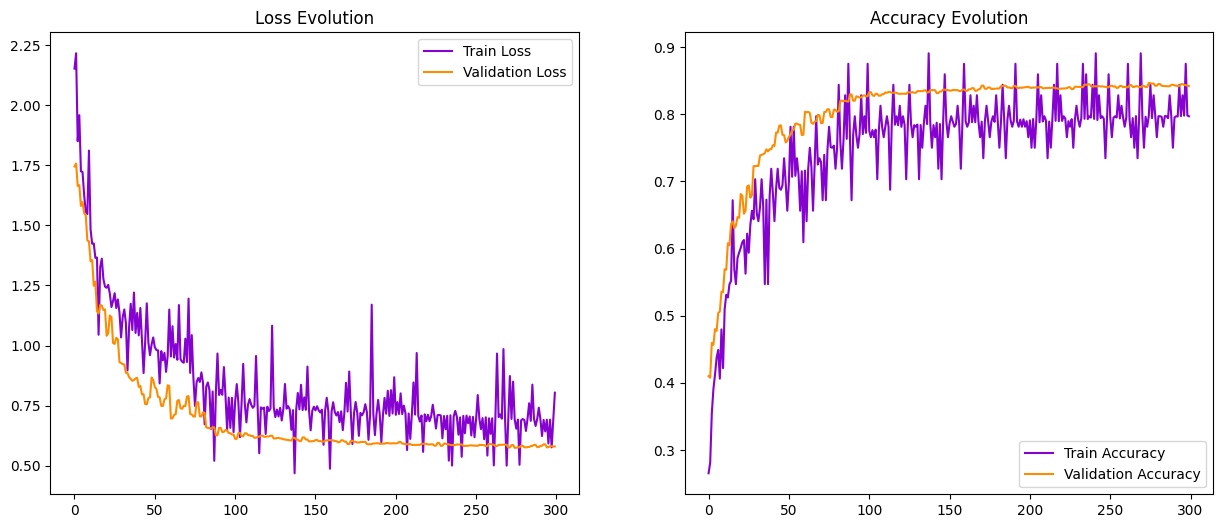

In [33]:
plt.figure(figsize=(15,6))

# Plotting the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(nk_model.history.history['loss'], label='Train Loss', color='#8502d1')
plt.plot(nk_model.history.history['val_loss'], label='Validation Loss', color='darkorange')
plt.legend()
plt.title('Loss Evolution')

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(nk_model.history.history['accuracy'], label='Train Accuracy', color='#8502d1')
plt.plot(nk_model.history.history['val_accuracy'], label='Validation Accuracy', color='darkorange')
plt.legend()
plt.title('Accuracy Evolution')

plt.show()

In [34]:
test_loss,test_acc = nk_model.evaluate(x_test,y_test,verbose=1)

print("\nLoss:", test_loss)
print("\nAcuuracy: ", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8400 - loss: 0.5837

Loss: 0.5799185037612915

Acuuracy:  0.8393999934196472


In [3]:
#save the model 
nk_model.save('cnn_model.h5')


NameError: name 'nk_model' is not defined